# Diluted Unitary Fitting, Analysis

In [6]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

from quantum_channel import channel_spectrum
from kraus_channels import KrausMap, DilutedKrausMap
from utils import loader, saver
from quantum_tools import generate_haar_random, reshuffle

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [15]:
def resample_diluted(diluted_model, num_samples, rng):
    d = diluted_model.channel.d
    c = diluted_model.channel.c
    rank = diluted_model.channel.rank
    spectrum_resample_list = []
    for i in range(num_samples):
        diluted_resample = DilutedKrausMap(U=generate_haar_random(d, rng=rng), c=c, kraus_part=KrausMap(d, rank = rank))
        spectrum_resample = channel_spectrum(diluted_resample, keep_unity=False)
        spectrum_resample_list.append(spectrum_resample)
    
    spectrum_resample = np.real(np.concatenate(spectrum_resample_list))
    
    return spectrum_resample

path1 = "../experiments/data/"
path2 = "data/"

In [ ]:

[channel_list1, channel_list2, channel_list3, channel_list4, channel_list5, channel_list6, channel_list7] = loader(path1 + "channel_fullRank_belem_longTrain.p")

spectrum_target_list1 = [channel_spectrum(channel, keep_unity=False) for channel in channel_list1]
spectrum_target_list2 = [channel_spectrum(channel, keep_unity=False) for channel in channel_list2]
spectrum_target_list3 = [channel_spectrum(channel, keep_unity=False) for channel in channel_list3]
spectrum_target_list4 = [channel_spectrum(channel, keep_unity=False) for channel in channel_list4]

In [4]:
[distance_best_list1, model_best_list1] = loader(path1 + "diluted_fitting_8layer.model")
[distance_best_list2, model_best_list2] = loader(path1 + "diluted_fitting_16layer.model")
[distance_best_list3, model_best_list3] = loader(path1 + "diluted_fitting_24layer.model")
[distance_best_list4, model_best_list4] = loader(path1 + "diluted_fitting_32layer.model")

In [5]:
print(f"Mean Error, Std Error, Max Error, Min Error")
print(f"{np.mean(distance_best_list1):.4f}, {np.std(distance_best_list1):.4f}, {np.max(distance_best_list1):.4f}, {np.min(distance_best_list1):.4f}")
print(f"{np.mean(distance_best_list2):.4f}, {np.std(distance_best_list2):.4f}, {np.max(distance_best_list2):.4f}, {np.min(distance_best_list2):.4f}")
print(f"{np.mean(distance_best_list3):.4f}, {np.std(distance_best_list3):.4f}, {np.max(distance_best_list3):.4f}, {np.min(distance_best_list3):.4f}")
print(f"{np.mean(distance_best_list4):.4f}, {np.std(distance_best_list4):.4f}, {np.max(distance_best_list4):.4f}, {np.min(distance_best_list4):.4f}")


Mean Error, Std Error, Max Error, Min Error
0.0006, 0.0006, 0.0022, 0.0001
0.0025, 0.0019, 0.0055, 0.0001
0.0019, 0.0018, 0.0061, 0.0002
0.0011, 0.0013, 0.0043, 0.0001


In [7]:
for i, channel in enumerate(channel_list1):
    map = reshuffle(channel.choi)
    np.savetxt(f"data/superOp_threeQubits_8Layers_{i}.txt", map, fmt='%f')

for i, channel in enumerate(channel_list2):
    map = reshuffle(channel.choi)
    np.savetxt(f"data/superOp_threeQubits_16Layers_{i}.txt", map, fmt='%f')

for i, channel in enumerate(channel_list3):
    map = reshuffle(channel.choi)
    np.savetxt(f"data/superOp_threeQubits_24Layers_{i}.txt", map, fmt='%f')

for i, channel in enumerate(channel_list4):
    map = reshuffle(channel.choi)
    np.savetxt(f"data/superOp_threeQubits_32Layers_{i}.txt", map, fmt='%f')

for i, channel in enumerate(channel_list5):
    map = reshuffle(channel.choi)
    np.savetxt(f"data/superOp_threeQubits_40Layers_{i}.txt", map, fmt='%f')   

## Diluted Unitary comparison with Real Data

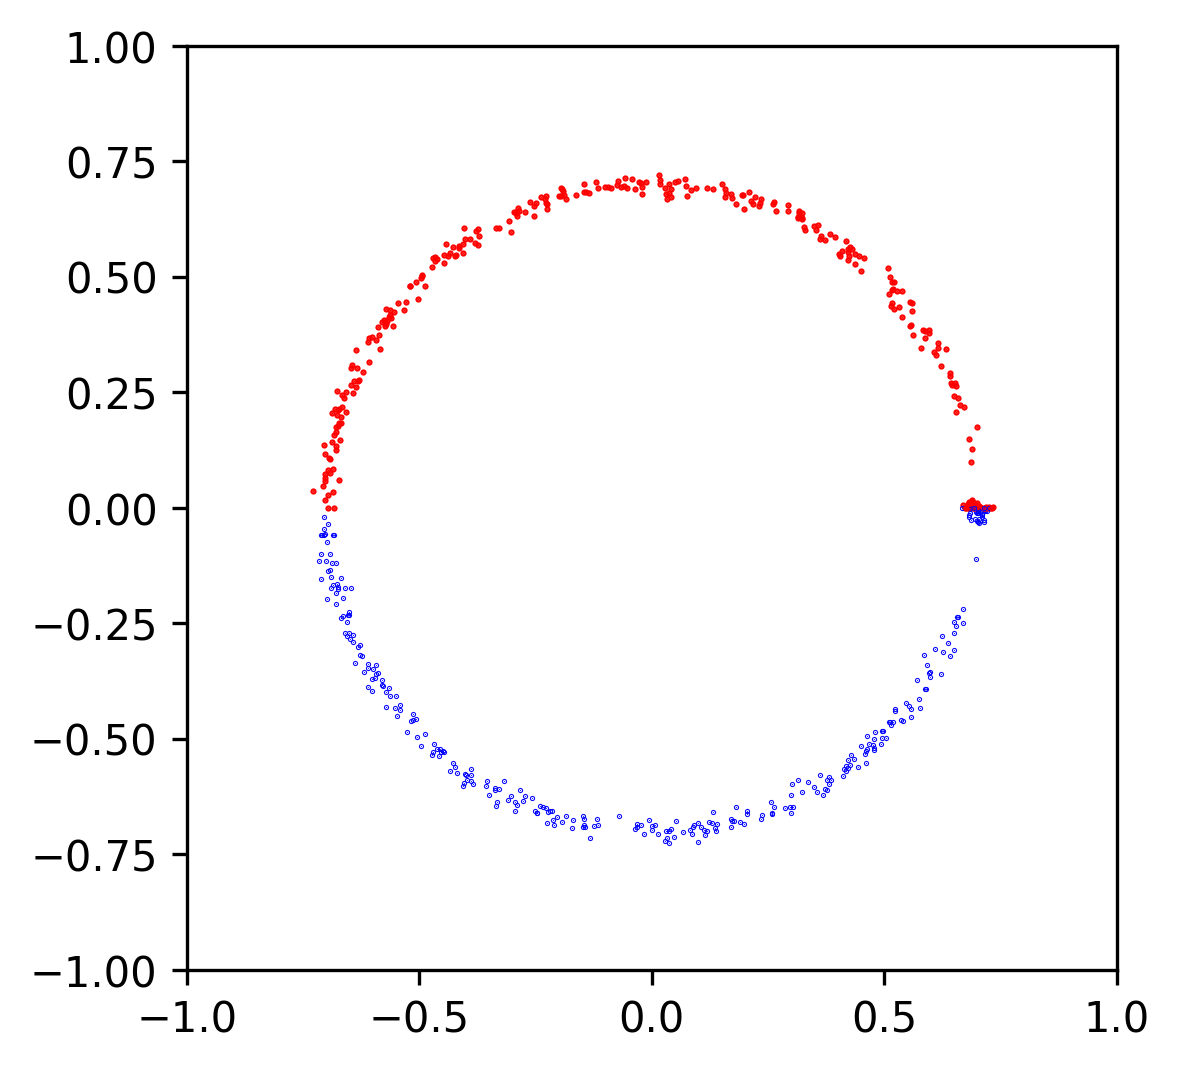

In [21]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

spectrum_resample_list = []
for diluted_model in model_best_list1:
    spectrum_resample = resample_diluted(diluted_model, num_samples = 1, rng=rng)
    spectrum_resample_list.append(spectrum_resample)

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

for spectrum, spectrum_resample in zip(spectrum_target_list1, spectrum_resample_list):
    spectrum = np.real(spectrum)
    spectrum_resample = np.real(spectrum_resample)
    spectrum = spectrum[spectrum[:,1]>0]
    spectrum_resample = spectrum_resample[spectrum_resample[:,1]<0]

    plt.plot(spectrum[:,0], spectrum[:,1], "ro", markersize=0.5)
    plt.plot(spectrum_resample[:,0], spectrum_resample[:,1], "b.", markersize=0.5)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
#plt.savefig(image_path("diluted_fitting_8layer.pdf"), bbox_inches='tight')
plt.show()
    


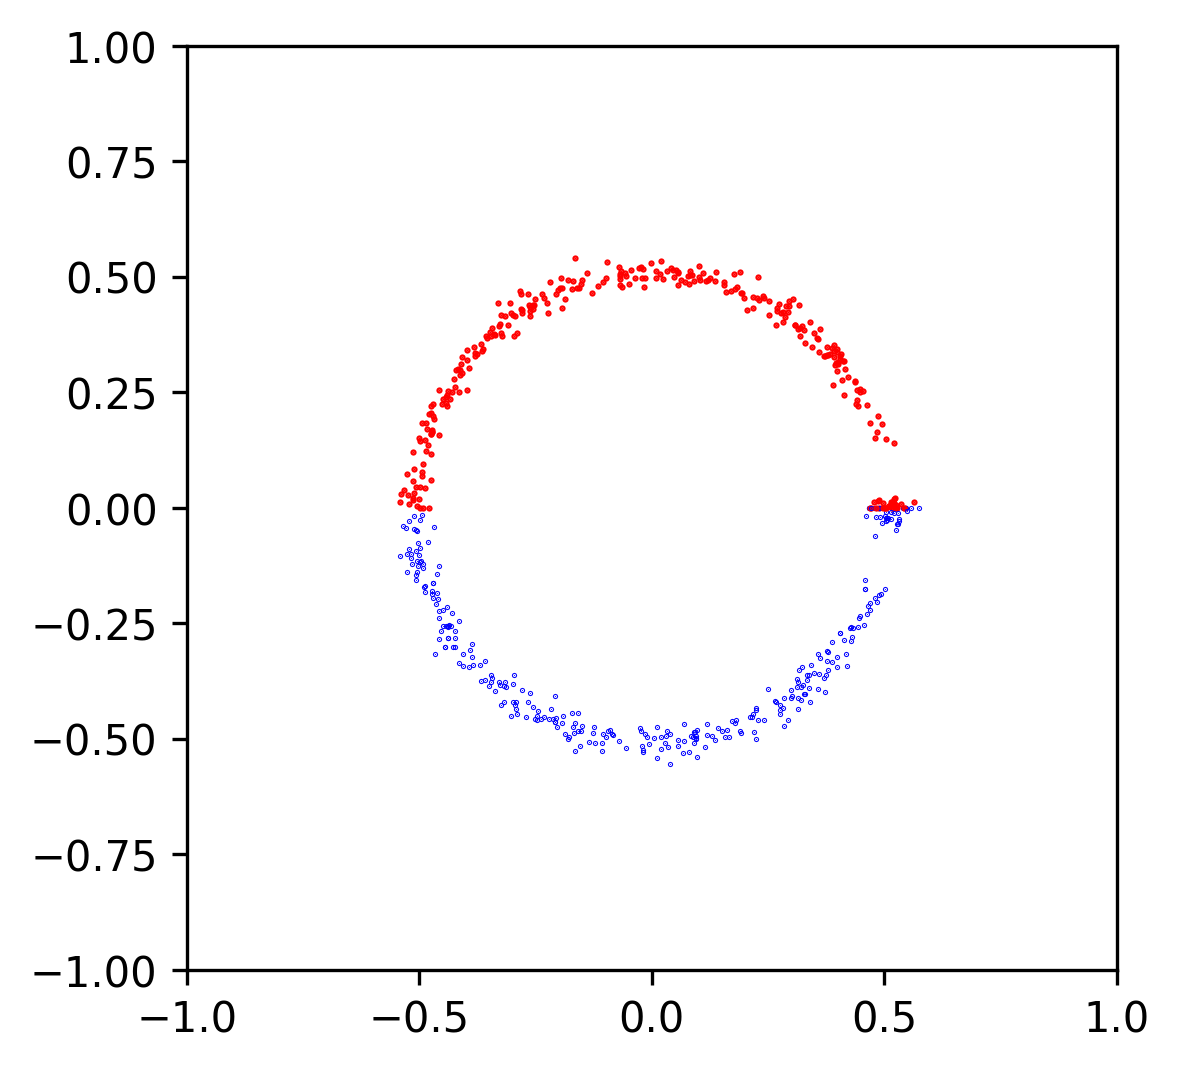

In [22]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

spectrum_resample_list = []
for diluted_model in model_best_list2:
    spectrum_resample = resample_diluted(diluted_model, num_samples = 1, rng=rng)
    spectrum_resample_list.append(spectrum_resample)

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

for spectrum, spectrum_resample in zip(spectrum_target_list2, spectrum_resample_list):
    spectrum = np.real(spectrum)
    spectrum_resample = np.real(spectrum_resample)
    spectrum = spectrum[spectrum[:,1]>0]
    spectrum_resample = spectrum_resample[spectrum_resample[:,1]<0]

    plt.plot(spectrum[:,0], spectrum[:,1], "ro", markersize=0.5)
    plt.plot(spectrum_resample[:,0], spectrum_resample[:,1], "b.", markersize=0.5)
#plt.savefig(image_path("diluted_fitting_8layer.pdf"), bbox_inches='tight')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()
    


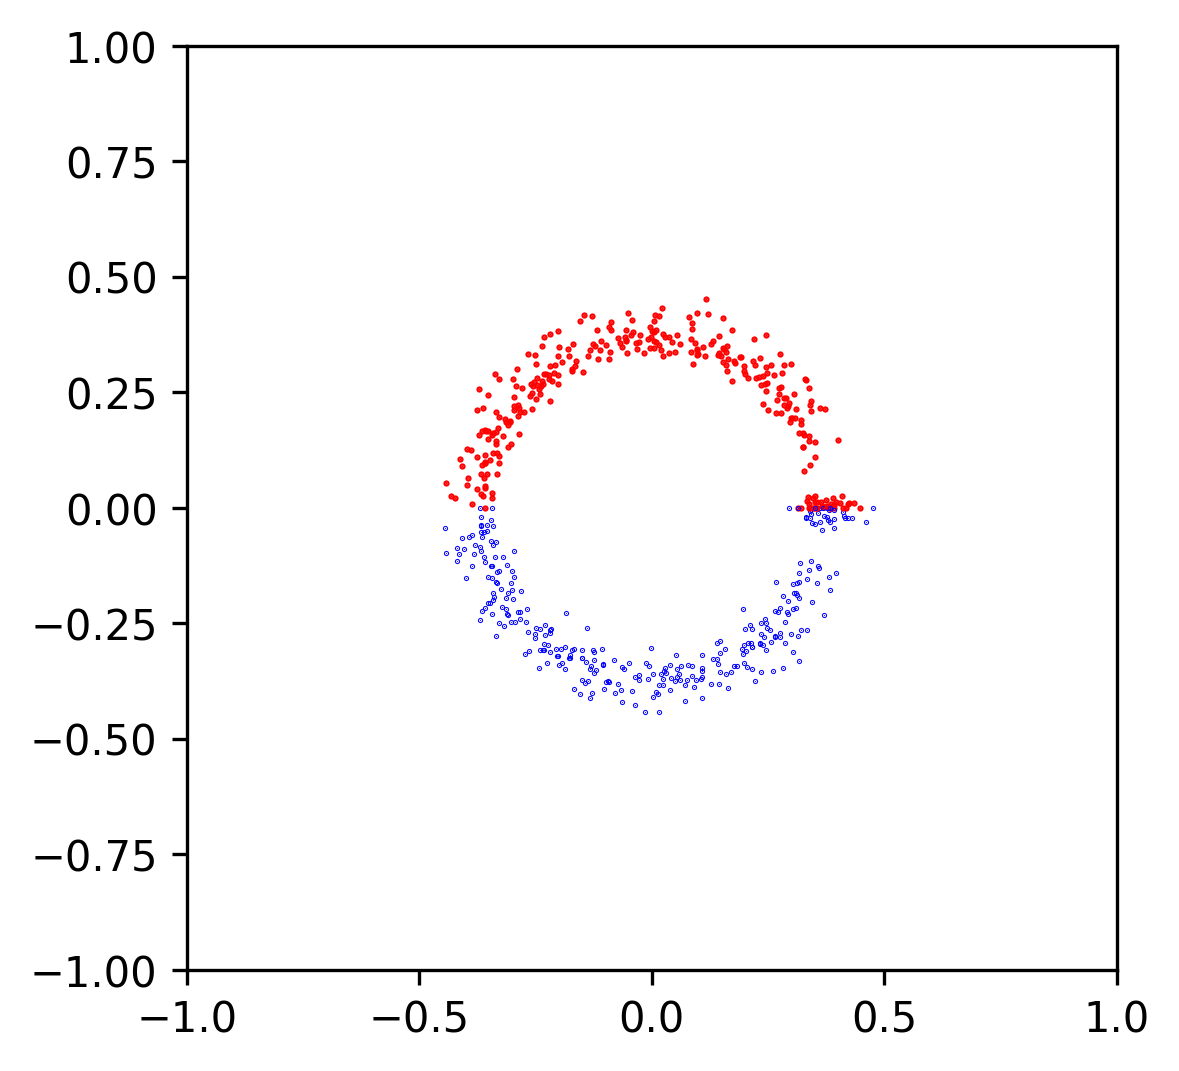

In [23]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

spectrum_resample_list = []
for diluted_model in model_best_list3:
    spectrum_resample = resample_diluted(diluted_model, num_samples = 1, rng=rng)
    spectrum_resample_list.append(spectrum_resample)

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

for spectrum, spectrum_resample in zip(spectrum_target_list3, spectrum_resample_list):
    spectrum = np.real(spectrum)
    spectrum_resample = np.real(spectrum_resample)
    spectrum = spectrum[spectrum[:,1]>0]
    spectrum_resample = spectrum_resample[spectrum_resample[:,1]<0]

    plt.plot(spectrum[:,0], spectrum[:,1], "ro", markersize=0.5)
    plt.plot(spectrum_resample[:,0], spectrum_resample[:,1], "b.", markersize=0.5)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
#plt.savefig(image_path("diluted_fitting_8layer.pdf"), bbox_inches='tight')
plt.show()
    


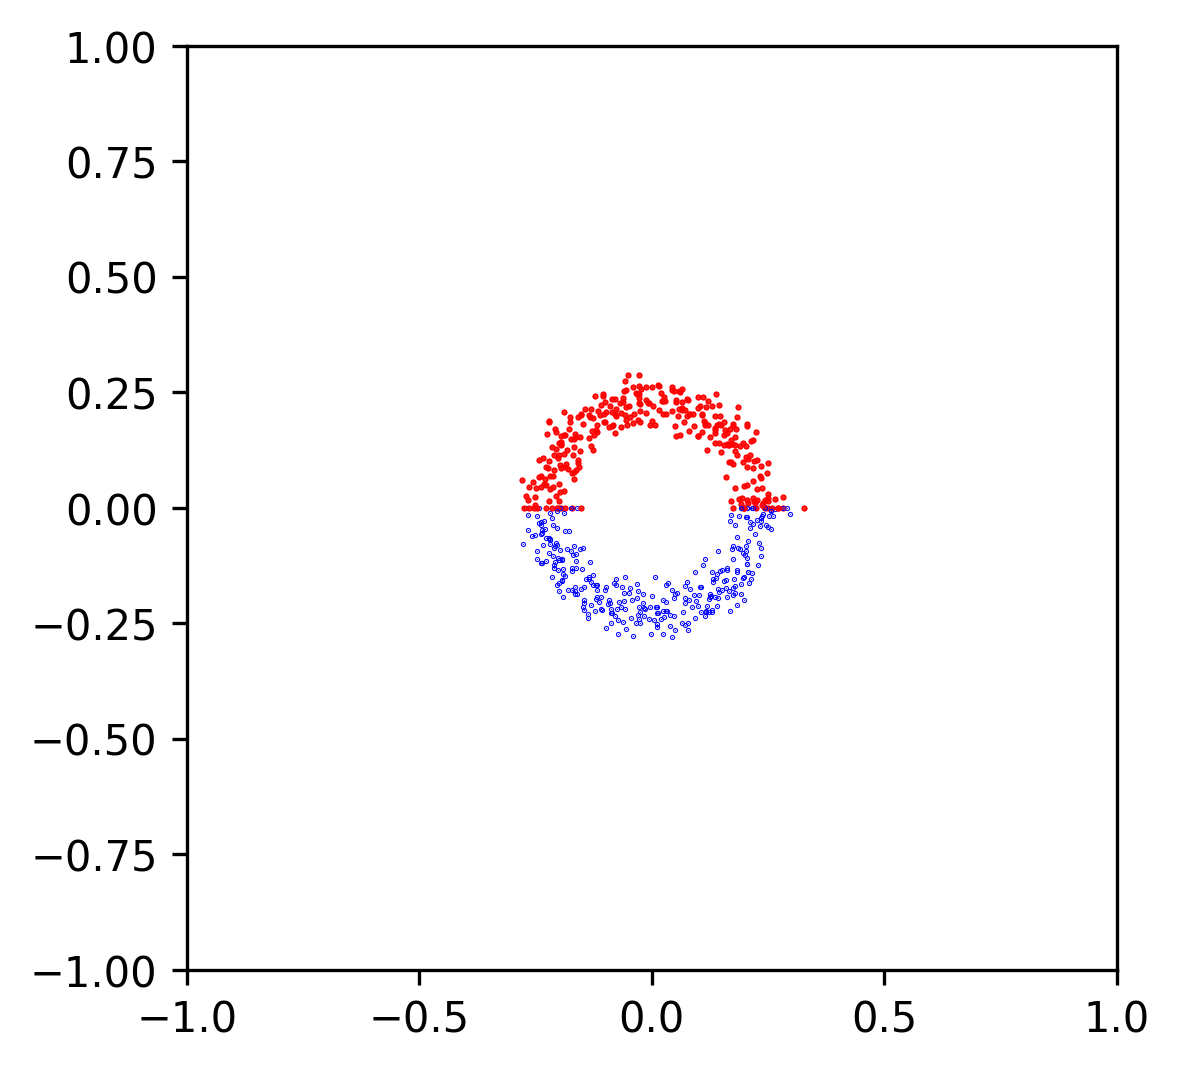

In [24]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

spectrum_resample_list = []
for diluted_model in model_best_list4:
    spectrum_resample = resample_diluted(diluted_model, num_samples = 1, rng=rng)
    spectrum_resample_list.append(spectrum_resample)

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

for spectrum, spectrum_resample in zip(spectrum_target_list4, spectrum_resample_list):
    spectrum = np.real(spectrum)
    spectrum_resample = np.real(spectrum_resample)
    spectrum = spectrum[spectrum[:,1]>0]
    spectrum_resample = spectrum_resample[spectrum_resample[:,1]<0]

    plt.plot(spectrum[:,0], spectrum[:,1], "ro", markersize=0.5)
    plt.plot(spectrum_resample[:,0], spectrum_resample[:,1], "b.", markersize=0.5)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
#plt.savefig(image_path("diluted_fitting_8layer.pdf"), bbox_inches='tight')
plt.show()
    


## Dump data

In [26]:
super_op1 = reshuffle(model1.channel.choi)
super_op2 = reshuffle(model2.channel.choi)
super_op3 = reshuffle(model3.channel.choi)
super_op4 = reshuffle(model4.channel.choi)
super_op5 = reshuffle(model5.channel.choi)

np.savetxt("data/superOp_1.txt", super_op1, fmt='%f')
np.savetxt("data/superOp_2.txt", super_op2, fmt='%f')
np.savetxt("data/superOp_3.txt", super_op3, fmt='%f')
np.savetxt("data/superOp_4.txt", super_op4, fmt='%f')
np.savetxt("data/superOp_5.txt", super_op5, fmt='%f')